# Guided Practical 2 - Random Intercept Models

This session we will show you: 

       1) the syntax of multilevel models in R. 
       2) how to establish if, and to what extent, variation occurs at different levels of clustering within a dataset
       3) how to compare the fit of different models
       4) how to extract, and plot, random effects
       5) how to add  explanatory variables to the model. 



### Introduction ###

We work with the hedonism data from the ESS. 

The data have a two-level hierarchical structure with individual respondents at level 1 and countries at level 2.  

We will treat country as a random classification (or grouping variable).  The target of inference could be a wider population of countries from which those in the study can be considered a random sample.  

It is not clear which countries such a population would contain.  In this case, it is more natural to think of the sample data as if they were a set of realisations from some underlying process that could extend through time and possibly space.  This process has driven the observations, but the statistics we compute from the observed data refer to a particular point in time and are subject to random fluctuations. We are interested in the underlying process that has generated the data we observe, and use the ‘sample’ data to make inferences about this process. 

Whatever our view about the data generation process, it seems reasonable to argue that the responses provided by indivduals who reside in a particular country will not be independnet observations; breaking the assumption of independence of case which under traditional regression methods.  These data are therefore a classic example of the type of data analysed using multilevel models.

### Load Required Packages ####

Two main packages are needed for the analysis in this tutorial.

"foreign" is used to import datasets, created in different statistical software, into R.  This package was also used in Tutorial 1.

"lme4" is the main package used to run multilevel models in R.  The basic syntax for this package is introuced below.  Later tutorials will build on the syntax introduced in this session to run models for different types of dependent variable.

"lattice" is one of the key packages for drawing graphs in R.  As demonstrated below, the command "dotplot" provides a simple way through which to plot random effects

In [4]:
library (foreign)
library (lme4)
library (lattice)

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Warning message:
“package ‘lattice’ was built under R version 4.2.3”


### The Dataset ###

We will analyse data from all 20 countries in the study.  The following countries were included in the study: Austria, Belgium, the Czech Republic, Denmark, Finland, France, Germany, Greece, Hungary, Ireland, Israel, Netherlands, Norway, Poland, Portugal, Slovenia, Spain, Sweden, Switzerland, and the United Kingdom. The combined sample size for these countries is 36,537. 

The dataset contains the following variables:

    1) age -    Respondent's age in years 
    2) female - 0 if respondent male, 1 if respondent female 
    3) eduyrs - Number of years of education of respondent 
    4) income - Respondent's monthly household income in bands (less than €150, €150-300, €300-500, €500-1000, €1000-1500,
    €1500-2000, €2000-2500, €2500-3000, €3000-5000, €5000-7500, €7500-10000, more than €10000). 

The data are stored in the file "hedon_intercept.dta" (which is a Stata datafile).  They can be imported into R using the "foreign" library.  The sytax below imports the dataset and stores it in a dataframe called "hedon"

In [5]:
hedon <- read.dta("hedon_intercept.dta")

str(hedon)

'data.frame':	36527 obs. of  7 variables:
 $ country: Factor w/ 20 levels "Austria","Belgium",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ indiv  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hed    : num  1.143 0.762 -0.976 -1.667 1.143 ...
 $ eduyrs : int  11 14 9 18 15 11 10 17 16 8 ...
 $ female : int  0 0 1 0 1 1 1 1 0 1 ...
 $ income : int  NA 2 NA 9 9 5 NA 9 8 NA ...
 $ age    : int  53 49 62 43 40 62 74 40 46 51 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr "13 Nov 2019 15:57"
 - attr(*, "formats")= chr [1:7] "%8.0g" "%12.0g" "%9.0g" "%8.0g" ...
 - attr(*, "types")= int [1:7] 251 253 254 251 251 251 251
 - attr(*, "val.labels")= chr [1:7] "country" "" "" "" ...
 - attr(*, "var.labels")= chr [1:7] "" "" "" "" ...
 - attr(*, "version")= int 12
 - attr(*, "label.table")=List of 1
  ..$ country: Named int [1:20] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..- attr(*, "names")= chr [1:20] "Austria" "Belgium" "Switzerland" "Czech" ...


As in Tutorial 1, we can use the "ls()" command to check which objects in the environment.  In this case, checking that "hedon" now exists.

In [6]:
ls()

[1] "hedon"

As always, before undertaking any statstical modelling, it is important to get a sense of your data and the type of variables you have to play with.

The "str()" command provides any overview of an object.  In the case of a dataframe, this includes the number of cases, the names of variables and the type of data they store.

The command "summary (hedon)" provides descriptive statistics for each variable in the dataframe, while the command "head (hedon)" displays the first few rows of data stored in the dataframe.

In [7]:
str(hedon)

'data.frame':	36527 obs. of  7 variables:
 $ country: Factor w/ 20 levels "Austria","Belgium",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ indiv  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hed    : num  1.143 0.762 -0.976 -1.667 1.143 ...
 $ eduyrs : int  11 14 9 18 15 11 10 17 16 8 ...
 $ female : int  0 0 1 0 1 1 1 1 0 1 ...
 $ income : int  NA 2 NA 9 9 5 NA 9 8 NA ...
 $ age    : int  53 49 62 43 40 62 74 40 46 51 ...
 - attr(*, "datalabel")= chr ""
 - attr(*, "time.stamp")= chr "13 Nov 2019 15:57"
 - attr(*, "formats")= chr [1:7] "%8.0g" "%12.0g" "%9.0g" "%8.0g" ...
 - attr(*, "types")= int [1:7] 251 253 254 251 251 251 251
 - attr(*, "val.labels")= chr [1:7] "country" "" "" "" ...
 - attr(*, "var.labels")= chr [1:7] "" "" "" "" ...
 - attr(*, "version")= int 12
 - attr(*, "label.table")=List of 1
  ..$ country: Named int [1:20] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..- attr(*, "names")= chr [1:20] "Austria" "Belgium" "Switzerland" "Czech" ...


In [8]:
summary(hedon)

        country          indiv            hed              eduyrs     
 Germany    : 2785   Min.   :    1   Min.   :-4.1580   Min.   : 0.00  
 Greece     : 2453   1st Qu.: 9132   1st Qu.:-0.8330   1st Qu.: 9.00  
 Netherlands: 2301   Median :18264   Median :-0.1190   Median :12.00  
 Austria    : 2203   Mean   :18264   Mean   :-0.2036   Mean   :11.92  
 Israel     : 2167   3rd Qu.:27396   3rd Qu.: 0.5000   3rd Qu.:14.00  
 Switzerland: 2005   Max.   :36527   Max.   : 3.2500   Max.   :40.00  
 (Other)    :22613                                     NA's   :445    
     female           income            age       
 Min.   :0.0000   Min.   : 1.000   Min.   :14.00  
 1st Qu.:0.0000   1st Qu.: 4.000   1st Qu.:32.00  
 Median :1.0000   Median : 6.000   Median :45.00  
 Mean   :0.5292   Mean   : 5.963   Mean   :46.16  
 3rd Qu.:1.0000   3rd Qu.: 8.000   3rd Qu.:60.00  
 Max.   :1.0000   Max.   :12.000   Max.   :98.00  
 NA's   :31       NA's   :6783     NA's   :163    

In [9]:
head (hedon)

,country,indiv,hed,eduyrs,female,income,age
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,Austria,1,1.143,11,0,NA,53
2,Austria,2,0.762,14,0,2,49
3,Austria,3,-0.976,9,1,NA,62
4,Austria,4,-1.667,18,0,9,43
5,Austria,5,1.143,15,1,9,40
6,Austria,6,1.500,11,1,5,62


Looking at the above output, answer the following questions.

    1) How many cases are in the dataset? length(hedon$indiv)  36527
    2) How many variables are in the dataset? ncol(hedon) 7
    3) What type of variable is "country"?

### Running a Variance Component Model ###

In R, a multilevel model for a continuous outcome can be estimated through the "lmer" command in the "lme4" package.

The syntax for "lmer" is broadly similar to that of the "lm" command used to run OLS regession models in R.  That is to say, the output is written to an object, involves a formula listing the dependent variable and any independent variables, as well as a reference to the dataframe that should be read in order to estimate the model.  In addition, the "lmer" command includes an argument to inform R of which variable represents the clustering of cases within the data.

When undertaking multilevel modelling, you should start by estimating a null model, or a Variance Component Model.  This is a model with no independent variables, it provides an estimate of the extent to which the unexplained variation in an outcome can be attributed to the different levels of clustering within the data (in this case how much of the variation in hedonism score can be attributed to the respondent, and how much to the country in which they live. 

The "lmer" command below works as follows :-

    1) The estimated model is written to an object called "nullmodel"
    2) The dependent variable is "hed" this is entered to the left of the ~ symbol.
    3) Any independent variables are listed to the right of the ~, seperated by +.  No independent variables are included in this model
    4) (1|country) defines the random part of the model.  In this case, a random intercept is requested (siginified by "1") and clusters of cases are represented by the variable "country"
    5) The model is to be estimated using the dataframe "hedon"
    6) Setting "REML=FALSE" means the model will be estimated through maximum, rather than restricted, likelihood.
    
Models estimated with maximum likelihood will typically yield more robust results that those which use restricted likelihood; however the latter may be useful when estimating complex models since ML estimation can be time consuming or fail to converge.

In [10]:
nullmodel <-lmer (hed~(1|country), data = na.omit(hedon), REML=FALSE)

Using the R "summary" command to view the "nullmodel" object provides an overview of the model that was just estimated.

In [11]:
summary (nullmodel)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 80005.1  80030.0 -39999.6  79999.1    29416 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1423 -0.6578  0.0691  0.7061  4.0805 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.09301  0.3050  
 Residual             0.88516  0.9408  
Number of obs: 29419, groups:  country, 20

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.22190    0.06843  -3.243

The above output should be considered in four main sections.

The output begins by summarising the requested model, it shows model formula, the dataset used and notes that the model was fitted through maximum likelihood.

This is followed by a range of overall model fit statistics, including AIC, BIC and the log-likelihood value.

The section headed "Random effects" details any coefficients/variables that are allowed to vary between clusters (in this case simply the intercept which varies between countries).  The figures in this section are used to calculate the Variance Partition Coefficient discussed below.

This section also notes the total number of cases used to estimate the model, and how many groups (clusters) were included in the model.  In this case 36527 cases, spread across 20 countries.  This information is useful for ensuring your model includes the expected data.

The final section of the output, title "Fixed Effects", provides details of the regression coefficients estimated by the model.  These summarise the average impact of each explanatory variable included in the model and are interpreted in the same way as coefficients in a single level OLS regression model.  In this case, the value of the Intercept suggests that the mean score on the hedonism variable is -0.20.

### Calculating Variance Partition Coefficients (VPC)##

The VPC is an estimate of the proportion of variance in the outcome that is accounted for by each level of data within the model.

The variance explained at level 2 (in this case between countries) is calculated as,

variance at level 2/ (variance at level 1+ variance at level 2).

In this case,

0.08977 / ( 0.88506 + 0.08977) = 0.09208 or 9.2%

That is to say 9.2% of the variation in hedonism within this dataset is attributable to differences between countries, while 90.8% is due to differences at the indivdual level.


### Establishing the Significance of a Multilevel Model ###

The Variance Component Model can provide a formal statsitical test of whether clustering is a dataset is sufficient to require the use of a multilevel model, as oppossed to a single level regression model.

Specifically, the overall model fit of the Variance Component Model is compared to an equivilent single level regression model.

The "lm" command below estimates a single level OLS regression of hedonism with an intercept as the only indepedent variable.  This model is stored in an object called "singlemodel".

In [12]:
singlemodel <- lm (hed~1, data = na.omit(hedon))

Comparing the two models through a chi-squared comparrison of their log-likelihood values provides a formal statistical test as to which model best fits the data.  Only if the multilevel model does not show a significant improvment in model fit could it be argued that a single level model might be appropriate for modelling the data.

The command "logLik()" reports the log-likelihood value for a previously estimated model, as shown in the command box below.

In [13]:
logLik(nullmodel)
logLik(singlemodel)

'log Lik.' -39999.57 (df=3)

'log Lik.' -41369.65 (df=2)

The likelihood ratio test statistic is calculated as the difference in the log likelihood values for the two models:

LR = 2(51294 – 49651)= 3288 on 1 d.f. (because there is only parameter difference between the models). 

Bearing in mind that the 5% point of a chi-squared distribution on 1 d.f. is 3.84, there is overwhelming evidence of country effects on hedonism.  This indicates that the multilevel model with country effects is most appropriate for modelling the data in this dataset.

An alternative method to the manual calculation shown above is to use the "anova" command as shown below.  The key figure in this output is Pr(>Chisq) which indicates the statsitical significance of the difference in model fit between the two models.  In this case the p-value indicates a highly significant improvmet in model fit.  This reflects the calculation above, with any minor differences attributable to rounding error.

In [14]:
anova (nullmodel, singlemodel)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
singlemodel,2,82743.30,82759.88,-41369.65,82739.30,NA,NA,NA
nullmodel,3,80005.13,80030.00,-39999.57,79999.13,2740.169,1,0


### Exploring Counrty Level Effects###

Having established that clustering does appear to exist within the data, an interesting question is which counries, on average, have the highest levels of hedonism? And how does each country vary from the "average" county?

These questions are addressed by reflecting on the random effects, and specifically the random intercepts, estimated within these models.  Within a model object, such as "nullmodel", which has been estimated through the "lme4" package, random effects are accessed through the "ranef" command.  

For example, the commands below create an object called "nullrand" which contains details of the random intercept for each country, as estimated within "nullmodel"



In [15]:
nullrand <- ranef(nullmodel)
nullrand


$country
            (Intercept)
Austria      0.00140527
Belgium      0.38310395
Switzerland  0.39730187
Czech       -0.50827287
Germany      0.08157257
Denmark      0.41400239
Spain       -0.25066098
Finland     -0.06469529
France       0.35710268
uk          -0.17389334
Greece      -0.16748004
Hungary      0.24762921
Ireland     -0.36715237
Israel       0.04620787
Netherlands  0.24681313
Norway      -0.15081205
Poland      -0.71201065
Portugal    -0.04518459
Sweden       0.25028683
Slovenia     0.01473641

with conditional variances for “country” 

Random effects are often presented as caterpillar plots.  These show not only the level 2 residual for each country with regards to the intercept, but also a 95% confidence interval and sorts level 2 clusters in terms of the nature/extent of their variation from the average.

The syntax below produces a caterpillar plot of the random intercepts associated with each country in "nullmodel".  In the event that a model contains more than one random parameter (a random coefficient model, introduced in the next tutorial), seperate plots will be produced for each ransom effect.

$country


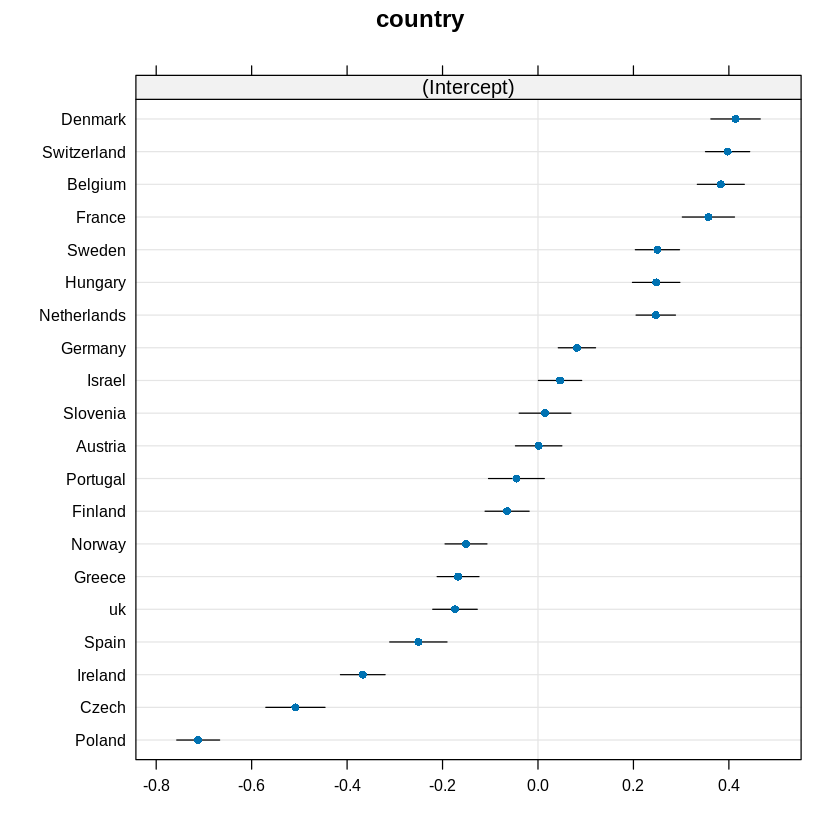

In [16]:
dotplot(ranef(nullmodel))

Recall that random effects respresent how a particular level 2 unit (in this case a country) varies from the average, measured in standard deviations.  Hence the figure 0.0 in the graph above represents the "average country".  Countries for which the confidence interval of the random effect does not cross 0.0 can be said to be different from the average.

Countries with negative random effects have, on average, lower levels of hedonism.  Positive random effects are assoicated with higher average levels of hedonism, i.e. on average Poland appears the least hedonistic country, while Denmark appears the most.

### Running a Random Intercept Model ###

Adding explanatory varaibles to the Variance Component Model turns the model into a Random Intercept Model. Comparing Random Intercept models to the previously estimated Variance Component Model will indicate the extent to which differences between countries remain after controlling for the independent variabes thata re then included.  Put another way, to what extent do any independent variables included in the Random Intercept Model help explain differences between countries? 

The next model considers only one independent variable (the respondent's age) but individual income, education and gender will be considered below. 

In essence, the research question has become `Do differences in hedonism between countries remain after controlling for individual age?'

As highlighted in Tutorial 1, it is standard practice to centre any continuous independent before estimating a multilevel model.  The following syntax calculates a new variable, "agecen" containing each respondent's age centered around the grand mean age of the sample.  The final command confirms that variable is now part of the "hedon" dataframe.

Recall from Tutorial 1 that centering the age variable makes interpretation of the model easier since the coefficient associated with the intercept can be interpreted as the average level of hedonism for a respondent of mean age.

        country          indiv            hed              eduyrs     
 Germany    : 2785   Min.   :    1   Min.   :-4.1580   Min.   : 0.00  
 Greece     : 2453   1st Qu.: 9132   1st Qu.:-0.8330   1st Qu.: 9.00  
 Netherlands: 2301   Median :18264   Median :-0.1190   Median :12.00  
 Austria    : 2203   Mean   :18264   Mean   :-0.2036   Mean   :11.92  
 Israel     : 2167   3rd Qu.:27396   3rd Qu.: 0.5000   3rd Qu.:14.00  
 Switzerland: 2005   Max.   :36527   Max.   : 3.2500   Max.   :40.00  
 (Other)    :22613                                     NA's   :445    
     female           income            age            agecen       
 Min.   :0.0000   Min.   : 1.000   Min.   :14.00   Min.   :-32.156  
 1st Qu.:0.0000   1st Qu.: 4.000   1st Qu.:32.00   1st Qu.:-14.156  
 Median :1.0000   Median : 6.000   Median :45.00   Median : -1.156  
 Mean   :0.5292   Mean   : 5.963   Mean   :46.16   Mean   :  0.000  
 3rd Qu.:1.0000   3rd Qu.: 8.000   3rd Qu.:60.00   3rd Qu.: 13.844  
 Max.   :1.0000   

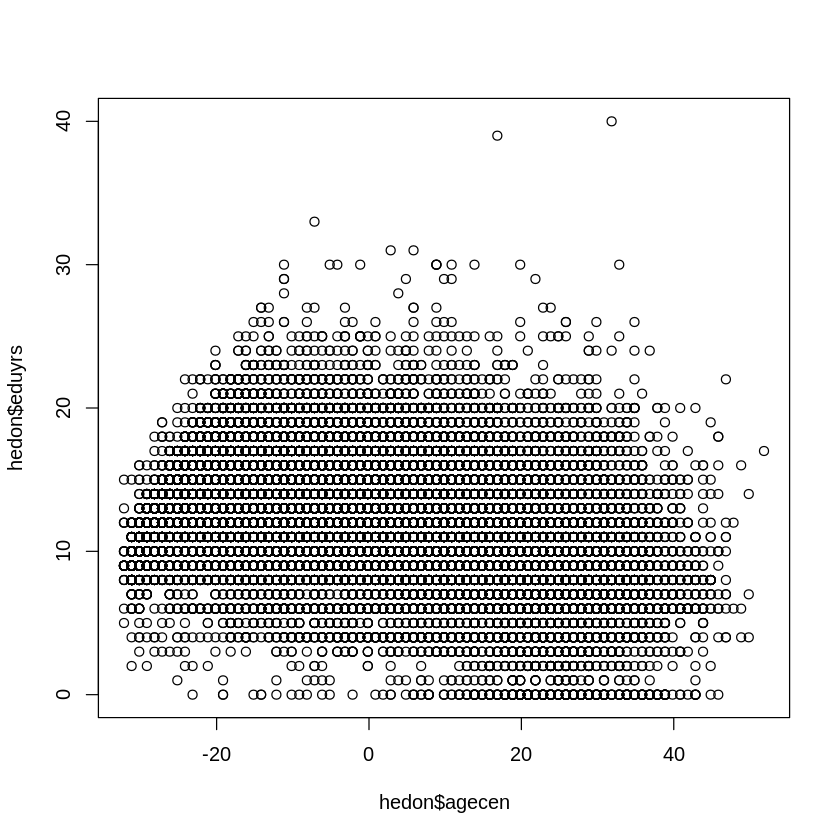

In [17]:
meanage <- mean (hedon$age, na.rm=TRUE)
hedon$agecen = hedon$age-meanage
summary (hedon)

plot(hedon$agecen, hedon$eduyrs)

The command box below shows the syntax needed to run a Random Intercept Model with centered age as the only independent variable.  The syntax is esentially the same as for the Variance Component Model with the addition of "agecen +" to the right-hand side of the ~.  

This is essentially the same as adding an explanatory variable to an OLS regression estimated using the "lm" command.

The Random Intercept model is stored in an object called "ri1".

In [18]:
ri1 <-lmer (hed~ agecen + (1|country), data = na.omit(hedon), REML=FALSE)
summary (ri1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 76790.0  76823.1 -38391.0  76782.0    29415 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1322 -0.6558  0.0483  0.6901  4.7761 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.09151  0.3025  
 Residual             0.79342  0.8907  
Number of obs: 29419, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.2085103  0.0678553  -3.073
agecen      -0.0173135  0.0002969 -58.307

Correlation of Fixed Effects:
       (Intr)
agecen -0.003

The coefficient for age is -0.017 and can be interpreted as follows. Older people are less hedonistic; for every extra year, hedionism drops, on average, by 0.017. The t-value for this coefficient is highly statsitically significant.

Compared to the variance components model, the intercept has hardly changed, nor has the level 2 variance. This suggests that the answer to the question, "Do differences in hedonism between countries remain after controlling for individual age?" is `Yes'. 

However, as above, a formal answer to the question of whether significance variance exists at level 2 (the country level) of the model is best achieved by comparing the model fit of this model (ri1) with the equivalent single level model.

Using the command box below construct a single level OLS regression model of the effect of the centered age variable on hedonism; store that model in an object, and use the "anova" command to establish whether model "ri1" better fits the data compared to a single level model.  What do you conclude?

In [19]:
sl1 <- lm (hed~1+agecen, data = na.omit(hedon))
summary (sl1)
anova (ri1, sl1)


Call:
lm(formula = hed ~ 1 + agecen, data = na.omit(hedon))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0930 -0.6034  0.0638  0.6548  3.8436 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.205429   0.005489  -37.43   <2e-16 ***
agecen      -0.016991   0.000311  -54.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9408 on 29417 degrees of freedom
Multiple R-squared:  0.0921,	Adjusted R-squared:  0.09207 
F-statistic:  2984 on 1 and 29417 DF,  p-value: < 2.2e-16


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sl1,3,79902.90,79927.77,-39948.45,79896.90,NA,NA,NA
ri1,4,76789.99,76823.14,-38390.99,76781.99,3114.915,1,0


### Checking if the inclusion of an explanatory variable improves model fit###

Just as the Anova/chi-squared test can be used to compare the fit of a multilevel model to the eqivilent single level model, so it can be used to compare a Variance Component Model to a Random Intercept Model.  This formally addresses the question, "Has adding an explanatory variable to the model improved the fit of the model?"

Recall that the Variance Component Model was stored in an object called "nullmodel".  Hence, the "anova" command below should provide a test of which model best fits the data.

In [20]:
anova (ri1, nullmodel)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nullmodel,3,80005.13,80030.00,-39999.57,79999.13,NA,NA,NA
ri1,4,76789.99,76823.14,-38390.99,76781.99,3217.144,1,0


Log-likelihood ratio tests (the formal test behind the Anova command) require that both models have been run on identical samples.  Yet due to missing data on the age variable, the sample size for the random intercept model is 36364 compared to 36527 for the Variance Component Model.  This is reflected in the message "models were not all fitted to the same size of dataset"

The command below creates a new object "nullmodelx".  This repeats the Variance Component Model estimaed above but restricts the data used to those cases which were also used in the "ri1" model.  This is achieved through the argument,

data=na.omit(hedon[ , all.vars(formula(ri1))])

This command reduces the dataset by removing any cases which have missing data "na.omit" on any of the variables used in the ri1 model "all.vars(formula(ri1)"


In [21]:
nullmodelx <-lmer (hed~(1|country), data=na.omit(hedon), REML=FALSE)
summary (nullmodelx)
anova (ri1, nullmodelx)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 80005.1  80030.0 -39999.6  79999.1    29416 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1423 -0.6578  0.0691  0.7061  4.0805 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.09301  0.3050  
 Residual             0.88516  0.9408  
Number of obs: 29419, groups:  country, 20

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.22190    0.06843  -3.243

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nullmodelx,3,80005.13,80030.00,-39999.57,79999.13,NA,NA,NA
ri1,4,76789.99,76823.14,-38390.99,76781.99,3217.144,1,0


Despite model "nullmodelx" reporting a sample size of 36364 (which is identical to the sample size in model "ri1") the "anova" command still fails, reporting "all models must be fit to the same data object".

As an added level of robustness, when conducting a Log-likelihood Ratio Test, R requires not only that the two models been compared have identical sample sizes, but also that the underlying dataset used in both models were identical.  In order to conduct the comparrison of the two models it is therefore neccssary to rerun model "ri1" using the same dataset constraint as was employed to estimate model "nullmodelx".

This test formally confirms that the Random Intercept Model, including a respondent's age, is a better fit for the data than the null model which included no independent variables.

In [22]:
ri1x <-lmer (hed~ agecen + (1|country), data=na.omit(hedon), REML=FALSE)
summary (ri1x)
anova (nullmodelx, ri1x)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hed ~ agecen + (1 | country)
   Data: na.omit(hedon)

     AIC      BIC   logLik deviance df.resid 
 76790.0  76823.1 -38391.0  76782.0    29415 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1322 -0.6558  0.0483  0.6901  4.7761 

Random effects:
 Groups   Name        Variance Std.Dev.
 country  (Intercept) 0.09151  0.3025  
 Residual             0.79342  0.8907  
Number of obs: 29419, groups:  country, 20

Fixed effects:
              Estimate Std. Error t value
(Intercept) -0.2085103  0.0678553  -3.073
agecen      -0.0173135  0.0002969 -58.307

Correlation of Fixed Effects:
       (Intr)
agecen -0.003

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nullmodelx,3,80005.13,80030.00,-39999.57,79999.13,NA,NA,NA
ri1x,4,76789.99,76823.14,-38390.99,76781.99,3217.144,1,0


While the Level 2 variance was little changed between the null model and the random intercept model including age, suggesting that adding respondent age to the model did little to explain differences in hedonism between countries, there is a reduction in the Level 1 variance (0.7869 in model ri1x compared to 0.8854 in nullmodelx).  This suggests that including respondent age in the model does explain some of the variation in hedonism between individuals. 

### Controlling for a Respondent's Gender and Years of Education###

Consider the variables "female" and "eduyrs".  Expand the random intercept model to consider the impact of an individual's gender and experience of education on hedonism.  For each model you chose to run you should :-

    1) Centre independent variables as needed.
    2) Establish if adding additional variable(s) improves your model fit.
    3) Interpret the average impact of each independent variable in substantive terms
    4) Reflect on the extent to which introducing further indepndent variables changes the amount of unexplained variance at the individual and country levels
    5) Calculate a VPC for each model you run, and interpret any changes in this between models.
    6) Extract the random intercepts for your final model.  Compare the order of countries, and the magnitude of effects, to those in the null model above.

In [26]:

mean_ed <- mean(hedon$eduyrs, na.rm = T)
hedon$eduyrs_cen <- hedon$eduyrs - mean_ed
#First random intercepts regression includes a centred age variable and female
New_mlm1 <- lmer(hed ~ agecen + female + (1|country), data=na.omit(hedon), REML = FALSE)
#The second includes the same variables as the 1st model but also includes a centred variable for number of years of education
New_mlm2 <- lmer(hed ~ agecen + female + eduyrs_cen + (1|country), data=na.omit(hedon), REML = FALSE)
summary(New_mlm1)
summary(New_mlm2)
#In our  first model, the VPC is 10.3%, this suggests that 10.3% of the variance is explained by variation between country
0.0910/(0.0910 +0.79034)
#In our  first model, the VPC increases to 10.8%, this suggests that 10.8% of the variance is explained by variation between country
#This is most likely due to the number of educational years explaining away some of the residual variance. 
#It be that the educational years profiles within each country may vary. 
#In this case, controlling for it may lead to an increased VPC because the within country variance would be reduced..
0.09633/(0.09633 +0.79003)

#Now, we can take a look at random effects
rand_1 <- ranef(New_mlm1)
rand_2 <- ranef(New_mlm2)
dotplot(rand_2)
#The  random effects are substantially similar to the null model. Denmark and Switzerland closer to the top.
#However, there is some minor change with Switzerland now overtaking Denmark
#UK, Czech and Poland closer to the bottom in both models as well. Generally very similar with a few small changes.
#These small changes might be accounted for by the differently aged populations or the number of years of education pursued in the different countries.
print(rand_1).
print(rand_2)
anova(New_mlm2, ri1x)

ERROR: Error in parse(text = x, srcfile = src): <text>:26:14: unexpected symbol
25: #These small changes might be accounted for by the differently aged populations or the number of years of education pursued in the different countries.
26: print(rand_1).
                 ^


### Advanced Issue ###

Reflecting on the diagnostic commands introduced in Tutorial 1, can you produce residual plots for one of the multilevel models run in this tutorial?  You might consider a hedroskedasity check, and/or a q-q plot.

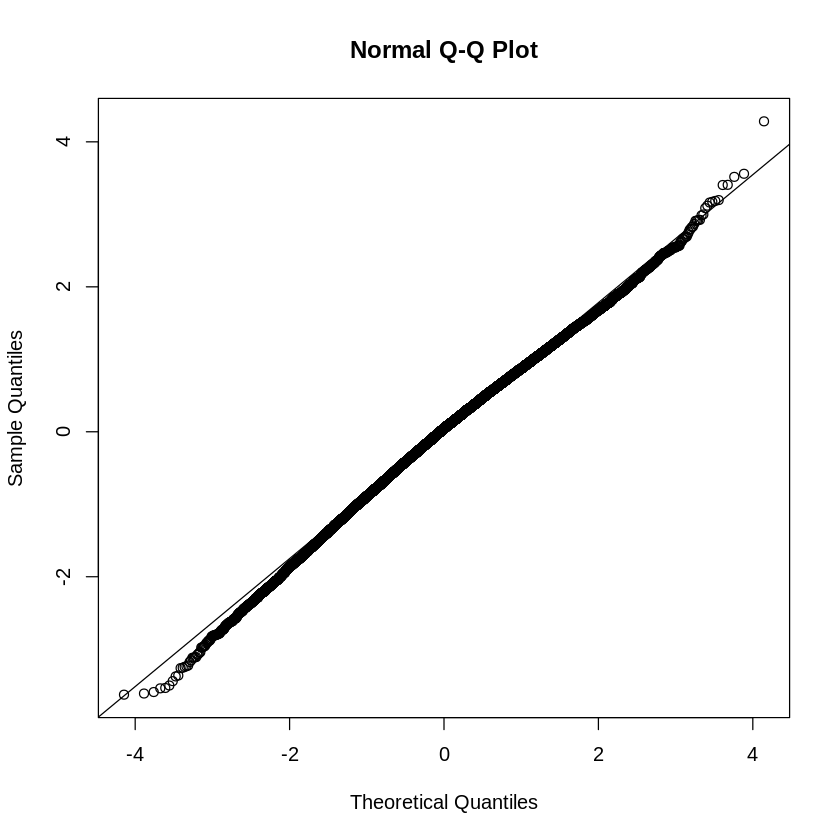

In [37]:
#We can use a qqplot to check for heteroskedasticity
estd <- residuals(mlm2)
qqnorm(estd)
qqline(estd)
#For the most part, it is on the 45 degree line but it might require some further modelling or model respecification

[1] 0.1086804

-0.23005589
0.51754634
-0.72845738
1.51434931
0.76674708
-0.23005589
-0.47925664
1.26514856
1.01594782
-0.97765812
0.01914485
